In [2]:
import pandas as pd

In [3]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [140]:
species = pd.read_csv("mapped_plant_quads_co_allrecords_cover.csv")

In [ ]:
species.head()

In [142]:
sp_plot = species.groupby(['year','species'], as_index = False).area.sum()

In [ ]:
sp_plot.head()

In [23]:
sp_plot_wide = sp_plot.pivot(index = 'year', columns = 'species', values = 'area')

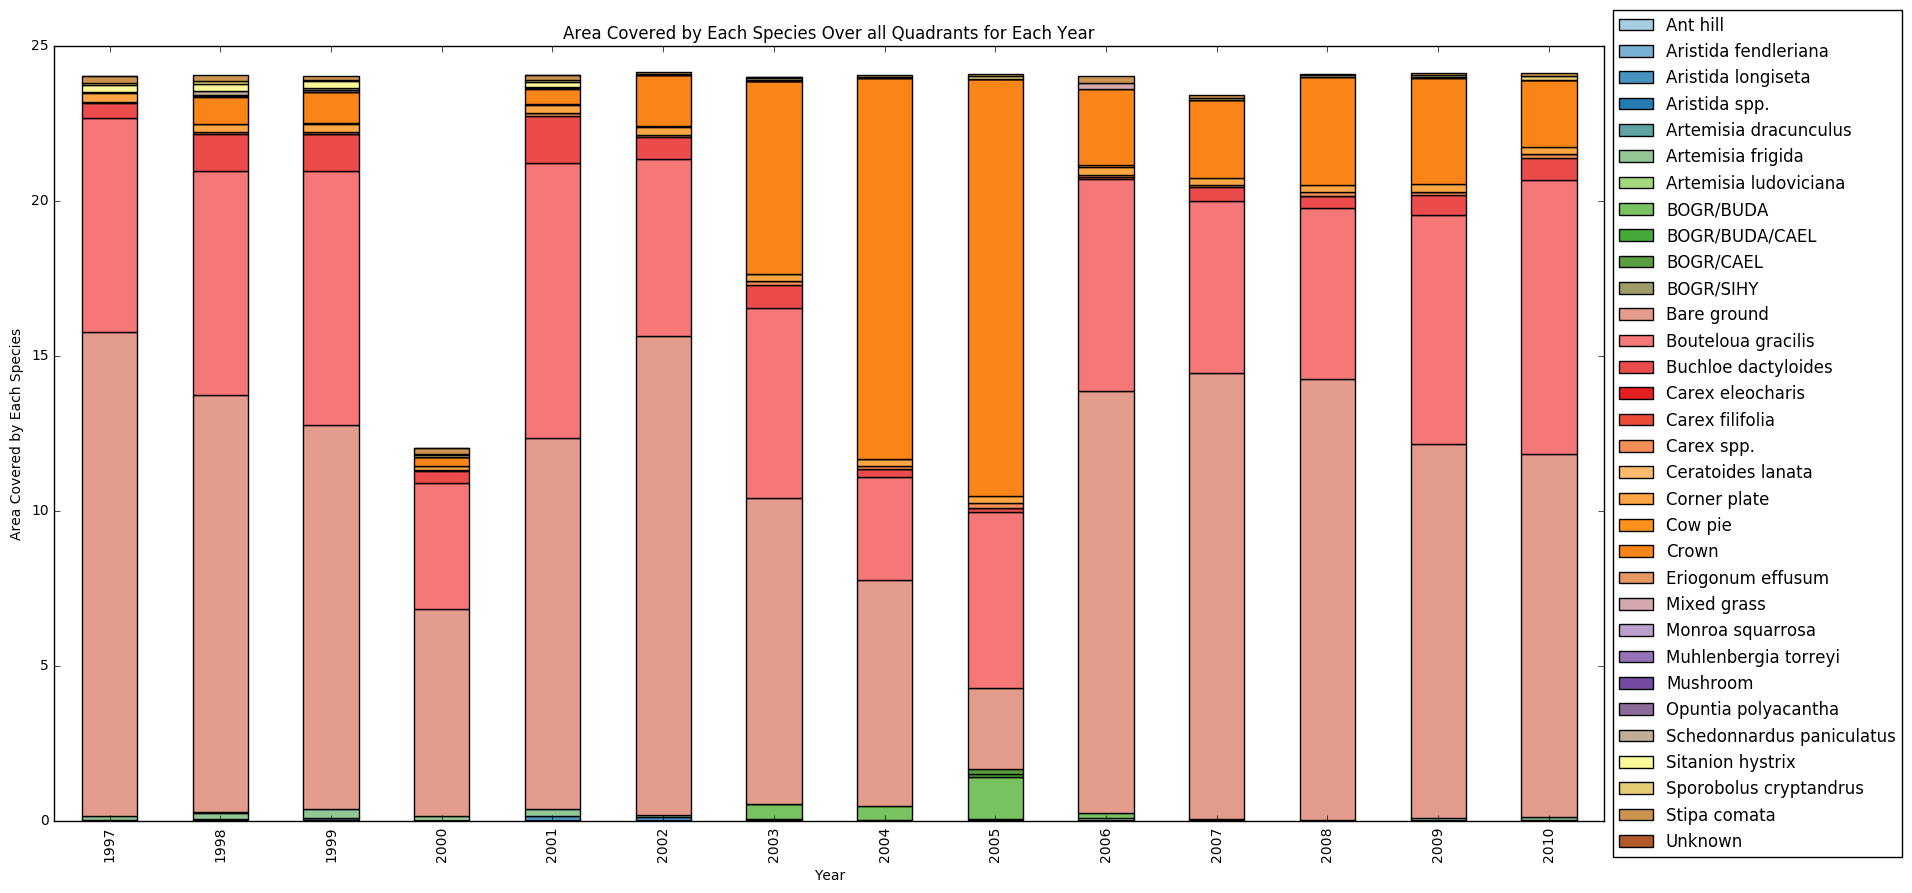

In [201]:
area_plot = sp_plot_wide.plot(kind = 'bar', stacked = True, legend = True, figsize=(20, 10), colormap="Paired",
                  title = "Area Covered by Each Species Over all Quadrants for Each Year")
area_plot.set_xlabel("Year")
area_plot.set_ylabel("Area Covered by Each Species")
area_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
sp_plot[sp_plot.year == 2000]

The file imported for this plot was picked because it contained the necessary variables to create the stacked bar graph which included quadrant, year, species and area. The head() command was used to check that the file contained the correct data/columns. The groupby() command was used to list the column names that were specifically being looked at; in this case, the area covered by each species for each year. However, the data had several repeats in species covering an area so the sum() command was placed at the end of the groupby() command to add areas together that contained the same species. This allowed for no repetition to occur within the data. The as_index was included as False to create the table. The pivot() command was called to create a dataframe of the specific information wanting to be graphed, which included year, species and area. A bar graph was created to look at the area covered by each species over all the quadrants for each year.   
From the graph, it can be seen that in the year 2000, there was less area covered by species followed by 2007. However between 1997 and 2002, two species dominated the areas being surveyed. It was not until 2003 that another species began to show up more frequently in the area throughout the following years along with the other two species from the previous years.

In [202]:
growth_form = pd.read_csv('mapped_plant_quads_co_species_list.csv')

In [203]:
species = pd.read_csv('mapped_plant_quads_co_allrecords_cover.csv')

In [204]:
growth_form.columns

Index(['species', 'density', 'cover', 'growthform', 'longevity'], dtype='object')

In [205]:
species.columns

Index(['quad', 'year', 'species', 'area', 'x', 'y'], dtype='object')

In [206]:
merged_inner = pd.merge(left = growth_form, right = species, left_on = 'species',
                       right_on = 'species')

In [207]:
merged_inner.head()

,species,density,cover,growthform,longevity,quad,year,area,x,y
0,Ant hill,1.0,26.0,Not plant,Not plant,gzgz_11,1998,0.000850,0.570731,0.847531
1,Ant hill,1.0,26.0,Not plant,Not plant,gzgz_11,2001,0.002545,0.255214,0.262510
2,Ant hill,1.0,26.0,Not plant,Not plant,gzgz_19,2000,0.001588,0.871814,0.010743
3,Ant hill,1.0,26.0,Not plant,Not plant,gzgz_19,2000,0.001937,0.959438,0.051235
4,Ant hill,1.0,26.0,Not plant,Not plant,gzgz_19,2001,0.001034,0.175554,0.084255


In [208]:
growthform_plot = merged_inner.groupby(['growthform','year'], as_index = False).area.sum()

In [209]:
growthform_plot_wide = growthform_plot.pivot(index = 'year', columns = 'growthform', values = 'area')

In [215]:
growthform_plot_wide.head()

growthform,Crown,Not plant,Unknown,grass,shrub
year,,,,,
1997,NaN,15.924538,0.004016,7.979310,0.133389
1998,0.883835,13.721476,NaN,9.214863,0.233096
1999,1.001064,12.682916,NaN,10.059053,0.302240
2000,0.287084,6.790056,0.000349,4.772160,0.167591
2001,0.503875,12.287331,0.017111,11.035961,0.235150


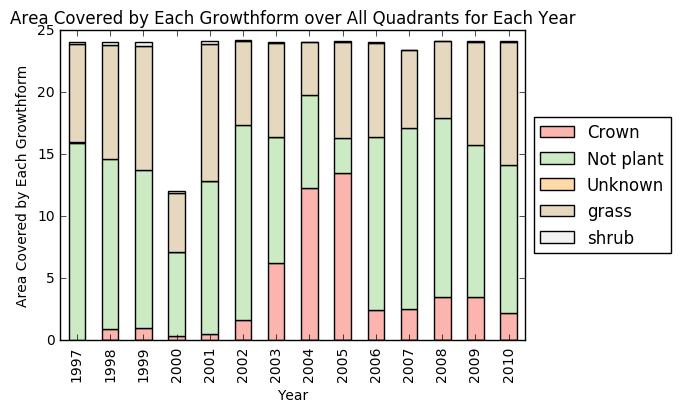

In [267]:
gf_plot = growthform_plot_wide.plot(kind = 'bar', stacked = True, colormap="Pastel1", 
                  title = "Area Covered by Each Growthform over All Quadrants for Each Year")
gf_plot.set_xlabel("Year")
gf_plot.set_ylabel("Area Covered by Each Growthform")
gf_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

The file imported for this particular plot was picked because it contained the necessary variable to create the stacked bar graph which was growthform. However, the file did not have the other necessary variables of year, area and quadrant. In order to get this data included within the imported file, a merge needed to occur. The previous file contained the other relevant variables. From the species and growth_form file, the species variable was the common column. That allowed for an inner merge to occur because the rows in both columns had matching values. The growth_form file was placed on the left side with the species file placed on the right with the species column bringing the two files together. The head() command was used to check that the new file/dataframe contained the correct data/column. The groupby() command was used to list the column names that were specifically being looked at; in this case, the area covered by each growthform for each year. However, the data had several repeats in growthform covering an area so the sum() command was placed at the end of the groupby() command. This allowed for no repetition to occur within the data. The pivot() command was called to create a dataframe of the information, which included year, growthform and area. A bar graph was created to look at the area covered by each growthform over all quadrants for each year.   
The graph produced looks exactly like the first graph produced. The only difference was instead of looking at area covered by each species, it was the area covered by each growthform. Different species are certain types of growthform so now the species have been grouped into types of growthforms. Again, in 2000, less area covered by the growthforms. The growthform, not plant, dominated all areas in most years, except 2004 and 2005. Shrubs seemed to be a weak growthform in the areas throughout the years being surveyed.

In [124]:
precipitation = pd.read_csv('mapped_plant_quads_co_daily_climate.csv')

In [125]:
precipitation.head()

,year,month,day,meant,flag_meant,maxt,flag_maxt,mint,flag_mint,precip,flag_precip
0,1997,1,1,8.33,g,16.11,g,0.56,g,0.000,g
1,1997,1,2,8.89,g,14.44,g,3.33,g,0.000,g
2,1997,1,3,10.56,g,21.67,g,-0.56,g,0.254,g
3,1997,1,4,3.61,g,8.89,g,-1.67,g,0.000,g
4,1997,1,5,-4.44,g,3.89,g,-12.78,g,0.000,g


In [126]:
merged_left = pd.merge(left = precipitation, right = merged_inner, left_on = 'year',
                       right_on = 'year', how='left')

In [127]:
merged_left.head()

,year,month,day,meant,flag_meant,maxt,flag_maxt,mint,flag_mint,precip,flag_precip,species,density,cover,growthform,longevity,quad,area,x,y
0,1997,1,1,8.33,g,16.11,g,0.56,g,0.0,g,Aristida longiseta,NaN,413.0,grass,P,gzgz_7,0.005062,0.101720,0.972302
1,1997,1,1,8.33,g,16.11,g,0.56,g,0.0,g,Aristida longiseta,NaN,413.0,grass,P,gzgz_7,0.002575,0.386230,0.979632
2,1997,1,1,8.33,g,16.11,g,0.56,g,0.0,g,Aristida longiseta,NaN,413.0,grass,P,gzgz_7,0.000510,0.665987,0.953504
3,1997,1,1,8.33,g,16.11,g,0.56,g,0.0,g,Aristida longiseta,NaN,413.0,grass,P,gzgz_7,0.001308,0.014583,0.911762
4,1997,1,1,8.33,g,16.11,g,0.56,g,0.0,g,Aristida longiseta,NaN,413.0,grass,P,gzgz_7,0.008975,0.363682,0.876801


In [249]:
precipitation.groupby('year', as_index = False).precip.mean()

,year,precip
0,1997,1.543701
1,1998,0.964534
2,1999,1.649775
3,2000,0.694447
4,2001,0.882880
5,2002,0.559414
6,2003,0.978355
7,2004,0.843191
8,2005,1.303524
9,2006,1.013762


In [248]:
meanprecip = precipitation.groupby('year',as_index = False).precip.mean()

In [251]:
merged_together = pd.merge(left = meanprecip, right = merged_inner, left_on = 'year',
                       right_on = 'year', how='left')

In [272]:
merged_together.head()

,year,precip,species,density,cover,growthform,longevity,quad,area,x,y
0,1997,1.543701,Aristida longiseta,NaN,413.0,grass,P,gzgz_7,0.005062,0.101720,0.972302
1,1997,1.543701,Aristida longiseta,NaN,413.0,grass,P,gzgz_7,0.002575,0.386230,0.979632
2,1997,1.543701,Aristida longiseta,NaN,413.0,grass,P,gzgz_7,0.000510,0.665987,0.953504
3,1997,1.543701,Aristida longiseta,NaN,413.0,grass,P,gzgz_7,0.001308,0.014583,0.911762
4,1997,1.543701,Aristida longiseta,NaN,413.0,grass,P,gzgz_7,0.008975,0.363682,0.876801


In [260]:
precipmean = merged_together.groupby(['year','growthform','precip'], as_index = False).area.sum()

In [270]:
precipmean.head()

growthform,Crown,Not plant,Unknown,grass,shrub
precip,,,,,
0.559414,1.647143,15.720092,NaN,6.708050,0.086694
0.694447,0.287084,6.790056,0.000349,4.772160,0.167591
0.843191,12.285852,7.509052,NaN,4.258776,0.010477
0.882880,0.503875,12.287331,0.017111,11.035961,0.235150
0.964534,0.883835,13.721476,NaN,9.214863,0.233096


In [262]:
precipmean = precipmean.pivot(index = 'precip', columns = 'growthform', values = 'area')

In [263]:
precipmean.head()

growthform,Crown,Not plant,Unknown,grass,shrub
precip,,,,,
0.559414,1.647143,15.720092,NaN,6.708050,0.086694
0.694447,0.287084,6.790056,0.000349,4.772160,0.167591
0.843191,12.285852,7.509052,NaN,4.258776,0.010477
0.882880,0.503875,12.287331,0.017111,11.035961,0.235150
0.964534,0.883835,13.721476,NaN,9.214863,0.233096


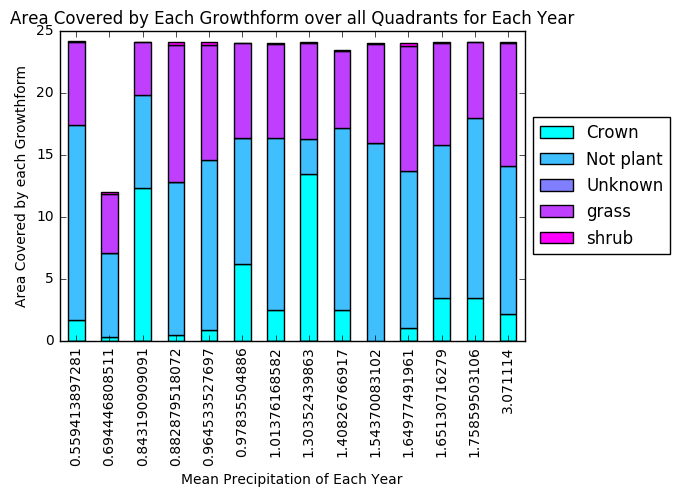

In [268]:
precip_mean = precipmean.plot(kind = 'bar', stacked = True, colormap="cool", 
                  title = "Area Covered by Each Growthform over all Quadrants for Each Year")
precip_mean.set_xlabel("Mean Precipitation of Each Year")
precip_mean.set_ylabel("Area Covered by each Growthform")
precip_mean.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
merged_together[merged_together.year == 2000]

The file imported for this particular plot was picked because it contained the necessary variable to create the stacked bar graph which was precipitation. However, the file did not have the other necessary variables of growthform, area and quadrant. In order to get this data included within the imported file, a merge needed to occur. From the precipitation file and the merged file from the previous graph, the year variable was the common column. That allowed for an inner merge to occur because the rows in both columns have matching values. The growth_form file was placed on the left side with the merged_inner file placed on the right with the year column bringing the two files together. The head() command was used to check that the new file/dataframe contained the correct data/column. The next step was to figure out how to find the mean precipitation. The mean precipitation was found from the original precipitation file in which the mean() command was called by the groupby() command to take mean precipitation from each year. Then another merge needed to occur with the new data of mean precipitation and the other variables. So using the mean precipitation data along with the merged data from the previous graph, a merge was created by bringing together year. The groupby() command was used to list the column names that were specifically being looked at; in this case, the area covered by each growthform over all quadrants as a function of mean precipitation for each year. However, the data had several repeats in growthform covering an area so the sum() command was placed at the end of the groupby() command. This allowed for no repetition to occur within the data. The pivot() command was called to create a dataframe of the information, which included precipitation (mean), growthform and area. A bar graph was created to look at the area covered by each growthform over all quadrants as a function of the mean precipitation for the year.     
When analyzing the graph, the mean precipitation of 0.694 had the least amount of area covered by each growthform. The stacked bar for this specific value looked similar to a specific year in the previous two graphs. The other two graphs, it was the year 2000 that showed the least amount of area covered by both species and growthforms. So looking at 2000 in this particular dataframe, 2000 matched up with this mean precipitation. There does not seem to be a connection between mean precipitation and areas covered by species/growthform. There was a year that had less precipitation than 2000 but there were still species/growthforms that covered a large area, almost double. And the year with the most precipitation looked like the year with the least precipitation. Precipitation also did not affect the type of growthform found in the area.

In [136]:
elevation = pd.read_csv('mapped_plant_quads_co_quad_info.csv')

In [137]:
elevation.head()

,quadrat,pasture,latitude,longitude,elevation,before1997,from1997
0,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed
1,gzgz_19,19,40.823798,-104.710306,1633,grazed,grazed
2,gzgz_24,24,40.822824,-104.729504,1650,grazed,grazed
3,gzgz_5a,5a,40.868138,-104.690792,1657,grazed,grazed
4,gzgz_5b,5b,40.867662,-104.680630,1661,grazed,grazed


In [138]:
elevation.columns

Index(['quadrat', 'pasture', 'latitude', 'longitude', 'elevation',
       'before1997', 'from1997'],
      dtype='object')

In [144]:
species.columns

Index(['quad', 'year', 'species', 'area', 'x', 'y'], dtype='object')

In [145]:
merged_out = pd.merge(left = elevation, right = species, left_on = 'quadrat',
                       right_on = 'quad')

In [146]:
merged_out.head()

,quadrat,pasture,latitude,longitude,elevation,before1997,from1997,quad,year,species,area,x,y
0,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800
1,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482
2,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623
3,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770
4,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494


In [147]:
elevation_plot = merged_out.groupby(['species','elevation'], as_index = False).area.sum()

In [148]:
elevation_plot_wide = elevation_plot.pivot(index = 'elevation', columns = 'species', values = 'area')

In [149]:
elevation_plot_wide.head()

species,Ant hill,Aristida fendleriana,Aristida longiseta,Aristida spp.,Artemisia dracunculus,Artemisia frigida,Artemisia ludoviciana,BOGR/BUDA,BOGR/BUDA/CAEL,BOGR/CAEL,...,Mixed grass,Monroa squarrosa,Muhlenbergia torreyi,Mushroom,Opuntia polyacantha,Schedonnardus paniculatus,Sitanion hystrix,Sporobolus cryptandrus,Stipa comata,Unknown
elevation,,,,,,,,,,,,,,,,,,,,,
1629,0.004095,NaN,0.001367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.032748,0.011952,0.185541,NaN
1630,NaN,NaN,0.010803,0.000050,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.073983,0.003012,0.404176,0.000676
1633,0.009628,NaN,0.016825,0.001663,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.249670,0.202173,0.004665,0.005509
1635,0.004543,NaN,0.004479,NaN,0.000767,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.001877,0.233467,0.101438,0.304766,0.000349
1650,0.006648,NaN,0.007421,NaN,NaN,0.05895,NaN,0.146178,NaN,NaN,...,0.181971,NaN,NaN,NaN,NaN,NaN,0.016840,NaN,0.002522,NaN


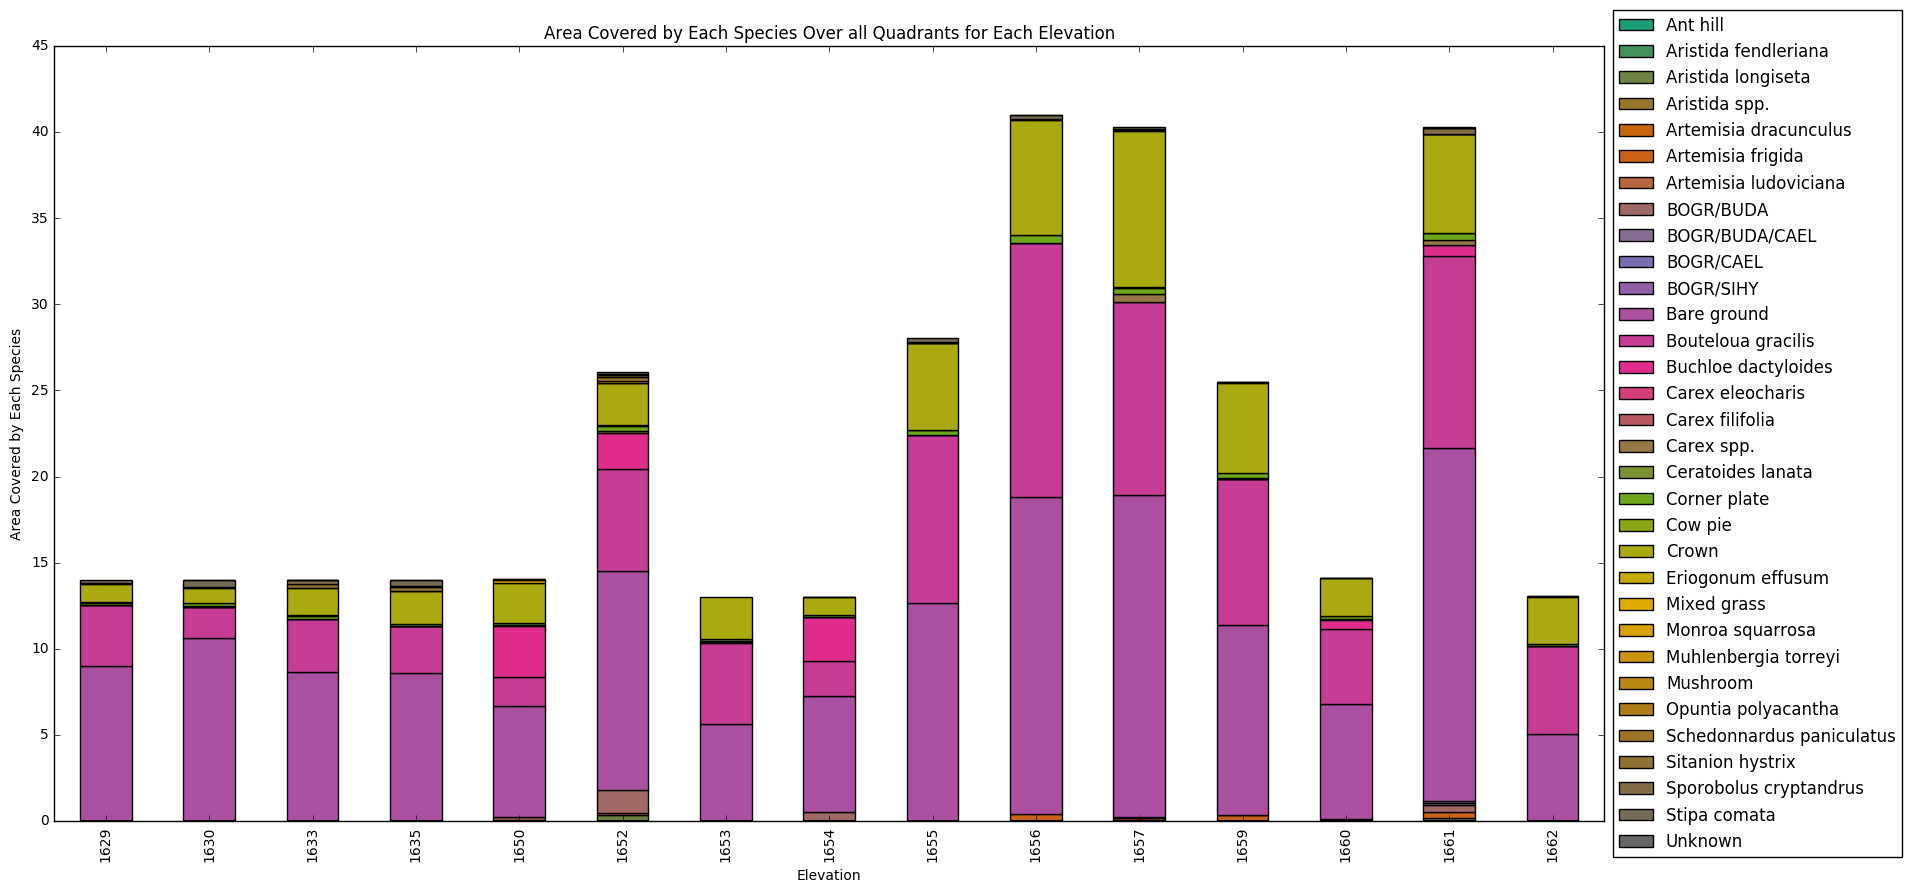

In [275]:
ele_plot = elevation_plot_wide.plot(kind = 'bar', stacked = True, figsize=(20, 10), colormap="Dark2", 
                  title = "Area Covered by Each Species Over all Quadrants for Each Elevation")
ele_plot.set_xlabel("Elevation")
ele_plot.set_ylabel("Area Covered by Each Species")
ele_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

The file imported for this particular plot was picked because it contained the necessary variable to create the stacked bar graph which was elevation. However, the file did not have the other necessary variables of species, area and quadrant. In order to get this data included within the imported file, a merge needed to occur. From the species file and elevation file, the quadrant variable was the common column. That allowed for an inner merge to occur because the rows in both columns had matching values. The elevation file was placed on the left side with the species file placed on the right with the quadrat and quad column bringing the two files together. The head() command was used to check that the new file/dataframe contained the correct data/column. The groupby() command was used to list the column names that were specifically being looked at; in this case, the area covered by each species at each elevation. However, the data had several repeats in species covering an area so the sum() command was placed at the end of the groupby() command. This allowed for no repetition to occur within the data. The pivot() command was called to create a dataframe of the information, which included elevation, species and area. A bar graph was created to look at the area coverd by each species per elevation.    
From the graph, it looks as if lower elevation has an effect on species covering an area but as elevation increases, there is a lot of variation occurring. The highest and lowest elevation seem to be similar. There does not seem to be any relationship between how high or low in elevation the species covering the area are found. As elevation varies, so does the types of species found. It does seem that at an elevation of 1661, there are more types of species found covering the area than any other elevation.